In [1]:
import numpy as np
import h5py
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import yaml
import argparse
import scipy.optimize

sys.path.append('../')
import utils
import settings
plt.style.use('../spectrum.mplstyle')

In [2]:
def reconstruct( samplings, mom2): 
    return np.sqrt( samplings*samplings + 0.0289148/3.0*mom2)

In [3]:
all_data = {}

In [15]:
fit_type = "2-exp"
data = h5py.File("energy_samplings_isosinglet_strange_fermionic_rebin10.hdf5")

<ipython-input-15-288aff99a33e>:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  data = h5py.File("energy_samplings_isosinglet_strange_fermionic_rebin10.hdf5")


In [16]:
single_hadrons = {
    "N":[],
    "pi":[],
    "S":[],
    "k":[],
}
for single_hadron in single_hadrons.keys():
    for i in range(5):
        try:
            single_hadrons[single_hadron].append(data['single_hadrons'][f'{single_hadron}({i})'][()])
        except KeyError:
            pass


In [17]:
data.close()

In [36]:
naming_map = {"pi":"P[SS0]","S":"S[SS0]","k":"k[SS0]","N":"N[SS0]"}
ff = pd.read_csv("estimated_averages.csv",delimiter=";",header=None)
rest_masses = {}
for corr in list(ff[0]):
    if "P=(0,0,0)" in corr:
        for single_hadron in single_hadrons.keys():
            if naming_map[single_hadron] in corr:
                rest_masses[single_hadron] = corr
rest_masses

{'pi': 'isotriplet S=0 P=(0,0,0) A1um P[SS0] 0',
 'k': 'isodoublet S=-1 P=(0,0,0) A1u k[SS0] 0',
 'N': 'isodoublet S=0 P=(0,0,0) G1g N[SS0] 0',
 'S': 'isotriplet S=-1 P=(0,0,0) G1g S[SS0] 0'}

In [ ]:
single_hadrons_reconstructed = {
    "N":[],
    "pi":[],
    "S":[],
    "k":[],
}

In [19]:
for single_hadron in single_hadrons.keys():
    single_hadrons_reconstructed[single_hadron].append(single_hadrons[single_hadron][0])
    for i in range(1,len(single_hadrons[single_hadron])):
        single_hadrons_reconstructed[single_hadron].append(reconstruct(single_hadrons[single_hadron][0],i))

In [20]:
all_data[fit_type] = {
        "fits":single_hadrons.copy(),
        "recons":single_hadrons_reconstructed.copy()
    }

([<matplotlib.axis.XTick at 0x1ce3b9b47f0>,
 [Text(0.25, 0, 'N'),
  Text(1.25, 0, 'pi'),
  Text(2.25, 0, 'S'),
  Text(3.25, 0, 'k')])

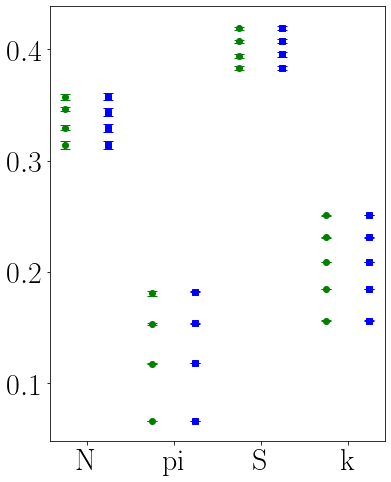

In [21]:
f = plt.figure()
f.set_figwidth(6)
f.set_figheight(8)
for j,single_hadron in enumerate(single_hadrons.keys()):
    for i in range(0,len(single_hadrons[single_hadron])):
        plt.errorbar(j,single_hadrons[single_hadron][i][0],yerr=utils.bootstrap_error_by_array(single_hadrons[single_hadron][i]),color=settings.colors[0],elinewidth=1.5,capsize=5, marker=settings.markers[0],lw=0)
        plt.errorbar(j+0.5,single_hadrons_reconstructed[single_hadron][i][0],yerr=utils.bootstrap_error_by_array(single_hadrons_reconstructed[single_hadron][i]),color=settings.colors[1],elinewidth=1.5,capsize=5, marker=settings.markers[1],lw=0)
plt.xticks(np.array(range(4))+0.25,list(single_hadrons.keys()))

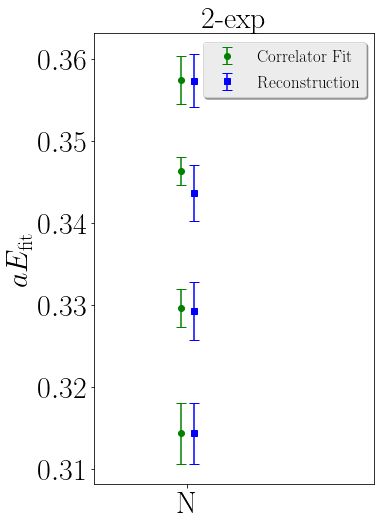

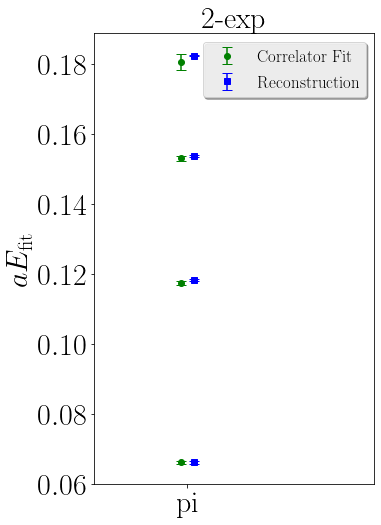

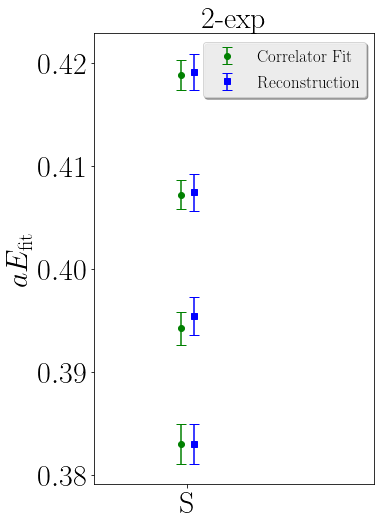

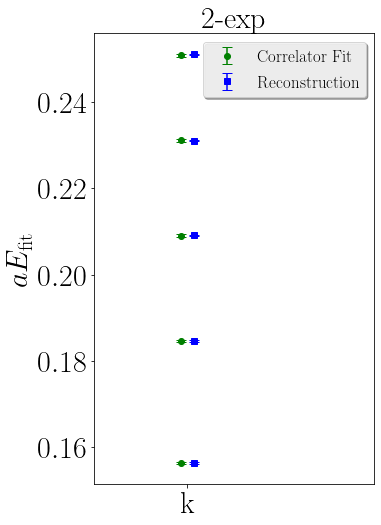

In [22]:
for j,single_hadron in enumerate(single_hadrons.keys()):
    f = plt.figure(facecolor="white")
    f.set_figwidth(6)
    f.set_figheight(8)
    i=0
    plt.title(fit_type)
    plt.errorbar(j+0.2,single_hadrons[single_hadron][i][0],yerr=utils.bootstrap_error_by_array(single_hadrons[single_hadron][i]),color=settings.colors[0],elinewidth=1.5,capsize=5, marker=settings.markers[0],lw=0, label="Correlator Fit")
    plt.errorbar(j+0.3,single_hadrons_reconstructed[single_hadron][i][0],yerr=utils.bootstrap_error_by_array(single_hadrons_reconstructed[single_hadron][i]),color=settings.colors[1],elinewidth=1.5,capsize=5, marker=settings.markers[1],lw=0, label="Reconstruction")
    for i in range(1,len(single_hadrons[single_hadron])):
        plt.errorbar(j+0.2,single_hadrons[single_hadron][i][0],yerr=utils.bootstrap_error_by_array(single_hadrons[single_hadron][i]),color=settings.colors[0],elinewidth=1.5,capsize=5, marker=settings.markers[0],lw=0)
        plt.errorbar(j+0.3,single_hadrons_reconstructed[single_hadron][i][0],yerr=utils.bootstrap_error_by_array(single_hadrons_reconstructed[single_hadron][i]),color=settings.colors[1],elinewidth=1.5,capsize=5, marker=settings.markers[1],lw=0)
    plt.xticks([j+0.25],[single_hadron])
    plt.xlim(j-0.5,j+1.75)
    plt.legend()
    plt.ylabel(r"$aE_{\textup{fit}}$")
    plt.tight_layout()
    plt.savefig(f"{single_hadron}-{fit_type}.png")

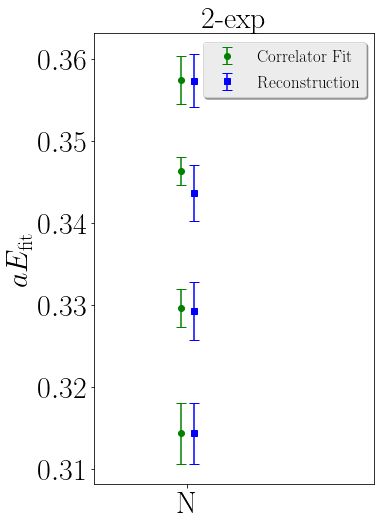

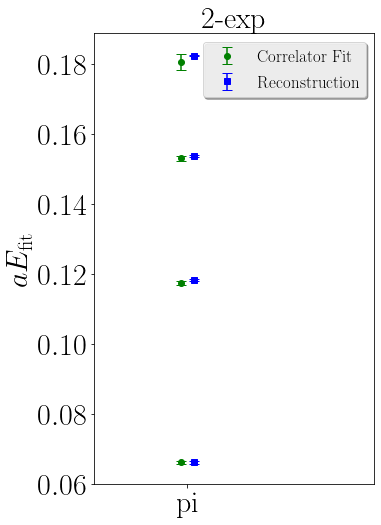

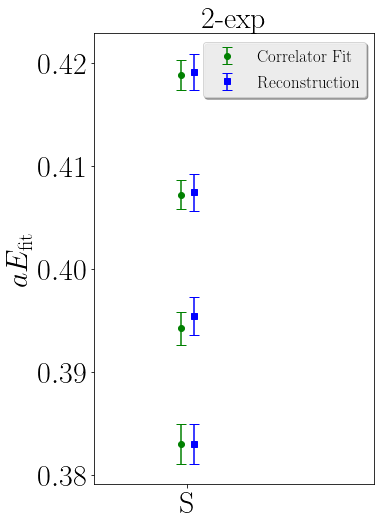

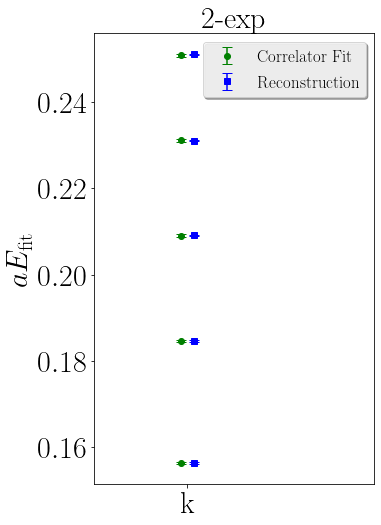

In [23]:
for j,single_hadron in enumerate(single_hadrons.keys()):
    f = plt.figure(facecolor="white")
    f.set_figwidth(6)
    f.set_figheight(8)
    i=0
    plt.title(fit_type)
    plt.errorbar(j+0.2,single_hadrons[single_hadron][i][0],yerr=utils.bootstrap_error_by_array(single_hadrons[single_hadron][i]),color=settings.colors[0],elinewidth=1.5,capsize=5, marker=settings.markers[0],lw=0, label="Correlator Fit")
    plt.errorbar(j+0.3,single_hadrons_reconstructed[single_hadron][i][0],yerr=utils.bootstrap_error_by_array(single_hadrons_reconstructed[single_hadron][i]),color=settings.colors[1],elinewidth=1.5,capsize=5, marker=settings.markers[1],lw=0, label="Reconstruction")
    for i in range(1,len(single_hadrons[single_hadron])):
        plt.errorbar(j+0.2,single_hadrons[single_hadron][i][0],yerr=utils.bootstrap_error_by_array(single_hadrons[single_hadron][i]),color=settings.colors[0],elinewidth=1.5,capsize=5, marker=settings.markers[0],lw=0)
        plt.errorbar(j+0.3,single_hadrons_reconstructed[single_hadron][i][0],yerr=utils.bootstrap_error_by_array(single_hadrons_reconstructed[single_hadron][i]),color=settings.colors[1],elinewidth=1.5,capsize=5, marker=settings.markers[1],lw=0)
    plt.xticks([j+0.25],[single_hadron])
    plt.xlim(j-0.5,j+1.75)
    plt.legend()
    plt.ylabel(r"$aE_{\textup{fit}}$")
    plt.tight_layout()
    plt.savefig(f"{single_hadron}-{fit_type}.png")

In [24]:
all_data['multi-exp'].keys()

dict_keys(['fits', 'recons'])

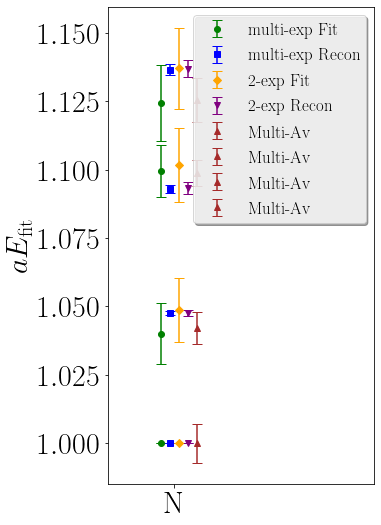

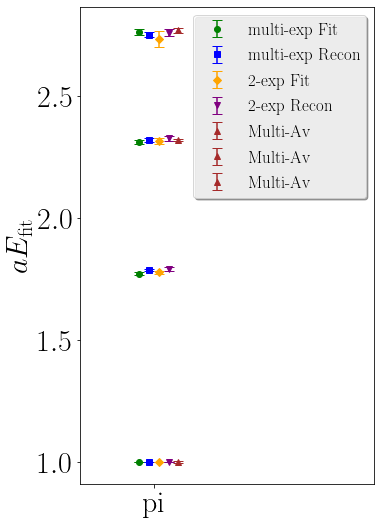

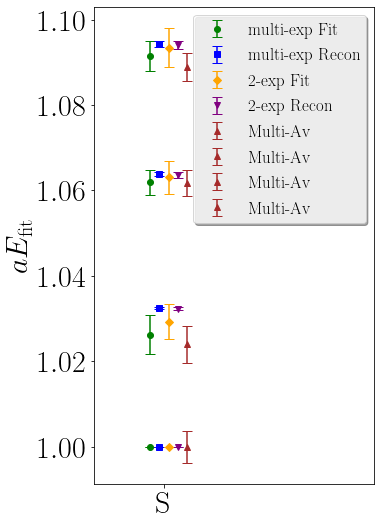

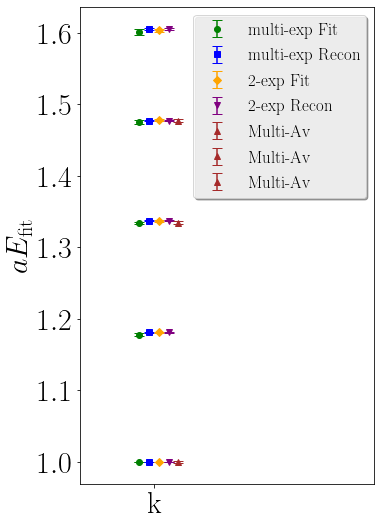

In [53]:
for single_hadron in single_hadrons.keys():
    f = plt.figure(facecolor="white")
    f.set_figwidth(6)
    f.set_figheight(8)
    j=0
    for fit in all_data.keys():
        i=0
        these_fit_samples = all_data[fit]['fits'][single_hadron]
        these_recon_samples = all_data[fit]['recons'][single_hadron]
        plt.errorbar(0.1+j*0.1,these_fit_samples[0][0]/these_fit_samples[0][0],yerr=utils.bootstrap_error_by_array(these_fit_samples[0]/these_fit_samples[0]),color=settings.colors[j+0],elinewidth=1.5,capsize=5, marker=settings.markers[j+0],lw=0, label=f"{fit} Fit")
        plt.errorbar(0.2+j*0.1,these_recon_samples[0][0]/these_recon_samples[0][0],yerr=utils.bootstrap_error_by_array(these_recon_samples[0]/these_recon_samples[0]),color=settings.colors[j+1],elinewidth=1.5,capsize=5, marker=settings.markers[j+1],lw=0, label=f"{fit} Recon")
        for i in range(1,len(these_fit_samples)):
            plt.errorbar(0.1+j*0.1,these_fit_samples[i][0]/these_fit_samples[0][0],yerr=utils.bootstrap_error_by_array(these_fit_samples[i]/these_fit_samples[0]),color=settings.colors[j+0],elinewidth=1.5,capsize=5, marker=settings.markers[j+0],lw=0)
            plt.errorbar(0.2+j*0.1,these_recon_samples[i][0]/these_recon_samples[0][0],yerr=utils.bootstrap_error_by_array(these_recon_samples[i]/these_recon_samples[0]),color=settings.colors[j+1],elinewidth=1.5,capsize=5, marker=settings.markers[j+1],lw=0)
        j+=2
        
    rest_mass = ff[ff[0]==rest_masses[single_hadron]][1].values[0]
    rest_mass_err = ff[ff[0]==rest_masses[single_hadron]][2].values[0]
    for corr in ff[0].values:
        if naming_map[single_hadron] in corr:
            plt.errorbar(0.1+j*0.1,ff[ff[0]==corr][1].values[0]/rest_mass,yerr=ff[ff[0]==corr][2].values[0]/rest_mass,color=settings.colors[j+0],elinewidth=1.5,capsize=5, marker=settings.markers[j+0],lw=0, label=f"Multi-Av")
    
    plt.xticks([0.25],[single_hadron])
    plt.xlim(-0.5,2.5)
    plt.legend()
    plt.ylabel(r"$aE_{\textup{fit}}$")
    plt.tight_layout()
    plt.savefig(f"{single_hadron}-all.png")

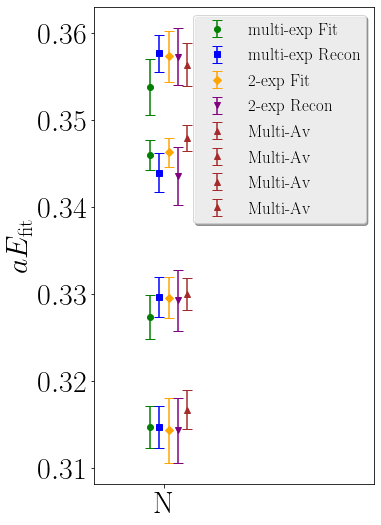

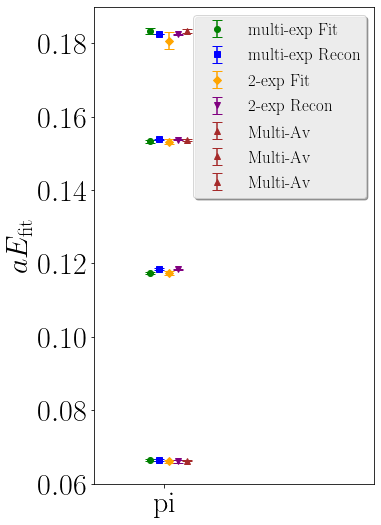

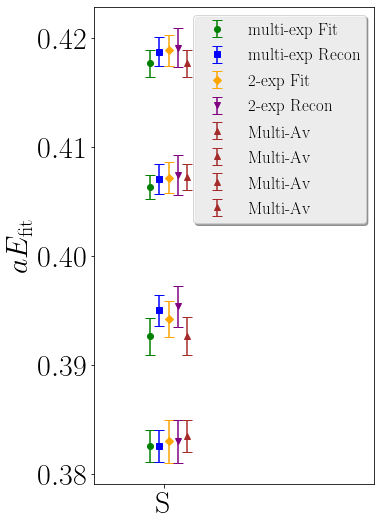

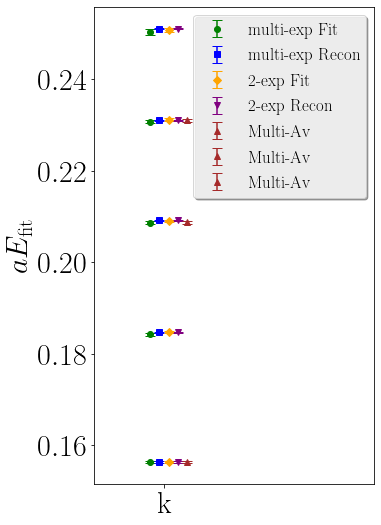

In [54]:
for single_hadron in single_hadrons.keys():
    f = plt.figure(facecolor="white")
    f.set_figwidth(6)
    f.set_figheight(8)
    j=0
    for fit in all_data.keys():
        i=0
        these_fit_samples = all_data[fit]['fits'][single_hadron]
        these_recon_samples = all_data[fit]['recons'][single_hadron]
        plt.errorbar(0.1+j*0.1,these_fit_samples[0][0],yerr=utils.bootstrap_error_by_array(these_fit_samples[0]),color=settings.colors[j+0],elinewidth=1.5,capsize=5, marker=settings.markers[j+0],lw=0, label=f"{fit} Fit")
        plt.errorbar(0.2+j*0.1,these_recon_samples[0][0],yerr=utils.bootstrap_error_by_array(these_recon_samples[0]),color=settings.colors[j+1],elinewidth=1.5,capsize=5, marker=settings.markers[j+1],lw=0, label=f"{fit} Recon")
        for i in range(1,len(these_fit_samples)):
            plt.errorbar(0.1+j*0.1,these_fit_samples[i][0],yerr=utils.bootstrap_error_by_array(these_fit_samples[i]),color=settings.colors[j+0],elinewidth=1.5,capsize=5, marker=settings.markers[j+0],lw=0)
            plt.errorbar(0.2+j*0.1,these_recon_samples[i][0],yerr=utils.bootstrap_error_by_array(these_recon_samples[i]),color=settings.colors[j+1],elinewidth=1.5,capsize=5, marker=settings.markers[j+1],lw=0)
        j+=2
        
    rest_mass = ff[ff[0]==rest_masses[single_hadron]][1].values[0]
    rest_mass_err = ff[ff[0]==rest_masses[single_hadron]][2].values[0]
    for corr in ff[0].values:
        if naming_map[single_hadron] in corr:
            plt.errorbar(0.1+j*0.1,ff[ff[0]==corr][1].values[0],yerr=ff[ff[0]==corr][2].values[0],color=settings.colors[j+0],elinewidth=1.5,capsize=5, marker=settings.markers[j+0],lw=0, label=f"Multi-Av")
    
    plt.xticks([0.25],[single_hadron])
    plt.xlim(-0.5,2.5)
    plt.legend()
    plt.ylabel(r"$aE_{\textup{fit}}$")
    plt.tight_layout()
    plt.savefig(f"{single_hadron}-all.png")